#**Actividad Semanal -- 6, visualización**

###**Maestría en Inteligencia Artificial Aplicada**
###**Curso: Ciencia y Analítica de DAtos**
###**Tecnológico de Monterrey**
###**Prof María de la Paz Rico Fernández**

###**Nombre del estudiante: Alejandro García Hernández**

###**Matrícula: A01793812**

In [27]:
#Se importan las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from warnings import filterwarnings

# 1. Descarga los datos y carga el dataset en tu libreta.

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv")

# 2. Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna().

In [3]:
#Se obtiene una descripción general de la base

tamanio = df.shape
print("La base contiene ", tamanio[0]," registros y ",tamanio[1]," columnas")

print("\nLos campos contenidos en la base son: ",df.columns)

print("\nImprimimos los primeros 3 elementos de nuestra base")
print(df.head(3))

La base contiene  30000  registros y  25  columnas

Los campos contenidos en la base son:  Index(['ID', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'Y'],
      dtype='object')

Imprimimos los primeros 3 elementos de nuestra base
   ID      X1   X2   X3   X4    X5   X6   X7   X8   X9  ...      X15      X16  \
0   1   20000  2.0  2.0  1.0  24.0  2.0  2.0 -1.0 -1.0  ...      0.0      0.0   
1   2  120000  2.0  2.0  2.0  26.0 -1.0  2.0  0.0  0.0  ...   3272.0   3455.0   
2   3   90000  2.0  2.0  2.0  34.0  0.0  0.0  0.0  0.0  ...  14331.0  14948.0   

       X17     X18     X19     X20     X21     X22     X23    Y  
0      0.0     0.0   689.0     0.0     0.0     0.0     0.0  1.0  
1   3261.0     0.0  1000.0  1000.0  1000.0     0.0  2000.0  1.0  
2  15549.0  1518.0  1500.0  1000.0  1000.0  1000.0  5000.0  0.0  

[3 rows x 25 columns]


In [4]:
print("\nDe igual forma, a continuación se muestra el tipo de dato de cada variable: ",df.dtypes)


De igual forma, a continuación se muestra el tipo de dato de cada variable:  ID       int64
X1       int64
X2     float64
X3     float64
X4     float64
X5     float64
X6     float64
X7     float64
X8     float64
X9     float64
X10    float64
X11    float64
X12    float64
X13    float64
X14    float64
X15    float64
X16    float64
X17    float64
X18    float64
X19    float64
X20    float64
X21    float64
X22    float64
X23    float64
Y      float64
dtype: object


In [5]:
print("Se obtiene el número de valores missing para cada una de las variables:")
print(df.isna().sum())

Se obtiene el número de valores missing para cada una de las variables:
ID      0
X1      0
X2      1
X3      2
X4      2
X5      5
X6      3
X7      5
X8      7
X9      9
X10    16
X11    14
X12    11
X13    11
X14    13
X15    15
X16    17
X17    10
X18     8
X19     9
X20     8
X21    11
X22    11
X23     5
Y       3
dtype: int64


In [6]:
#Con info() obtenemos la misma información que nos habían dado columns, isna() y dtypes. 
#Para el caso de los valores faltantes, con isna().sum() obtenemos el número de valores faltantes, mientras que con info() obtenemos el número de valores no nulos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      30000 non-null  int64  
 1   X1      30000 non-null  int64  
 2   X2      29999 non-null  float64
 3   X3      29998 non-null  float64
 4   X4      29998 non-null  float64
 5   X5      29995 non-null  float64
 6   X6      29997 non-null  float64
 7   X7      29995 non-null  float64
 8   X8      29993 non-null  float64
 9   X9      29991 non-null  float64
 10  X10     29984 non-null  float64
 11  X11     29986 non-null  float64
 12  X12     29989 non-null  float64
 13  X13     29989 non-null  float64
 14  X14     29987 non-null  float64
 15  X15     29985 non-null  float64
 16  X16     29983 non-null  float64
 17  X17     29990 non-null  float64
 18  X18     29992 non-null  float64
 19  X19     29991 non-null  float64
 20  X20     29992 non-null  float64
 21  X21     29989 non-null  float64
 22

# 3. Limpia los datos eliminando los registros nulos o rellena con la media de la columna.

In [7]:
#Dada la naturaleza de los datos y que el número de valores nulos es muy pequeño, se eliminarán estos registros de la base.
df = df.dropna()

#corroboramos que ya no haya valores nulos
df.isna().sum()

ID     0
X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
Y      0
dtype: int64

# 4. Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión.

In [8]:
df.describe()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,...,29958.000000,29958.000000,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000
mean,15005.550504,167555.900928,1.604012,1.853094,1.551739,35.483443,-0.017124,-0.134021,-0.166767,-0.221110,...,43279.335370,40328.984578,38889.925763,5664.614460,5.925715e+03,5228.429969,4829.873556,4801.481574,5220.708025,0.221143
std,8654.547473,129737.299088,0.489070,0.790471,0.521952,9.214319,1.123989,1.197171,1.196026,1.168419,...,64364.684347,60826.219326,59582.883301,16568.823518,2.305598e+04,17617.338167,15676.205514,15285.552652,17788.983767,0.415023
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7516.250000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2327.500000,1762.250000,1256.000000,1000.000000,8.352500e+02,390.000000,296.250000,253.250000,118.000000,0.000000
50%,15005.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19037.500000,18104.500000,17067.500000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22497.750000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54551.250000,50220.750000,49234.750000,5007.000000,5.000000e+03,4511.500000,4014.750000,4040.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


El cuadro desplegado con **describe()** nos da luz sobre la distribución de los datos:
- El valor de cada cuartil (1,2 y 3), indica que todos los valores que estén a la izquierda de esos cuartiles son el 25%,50% y 75% de los datos respectivamente. Entonces, si el valor del tercer cuartil está más cercano a la mediana que el primer cuartil, la distribución está sesgada a la derecha y si pasa lo contrario entonces está sesgada a la izquierda.
- En el ejemplo anterior, si la distribución está sesgada a la derecha entonces observaremos que la mediana es mayor a la media (ya que existen "muchos" valores pequeños que hacen que la media sea más pequeña. Y si está sesgada a la izquierda entonces la media es mayor a la mediana.
- De igual forma, con la desviación estándar y la media nos damos una idea de que tan agrupados o dispersos están nuestros datos.


# 5. Realiza el conteo de las variables categóricas.

Aunque como vimos con info() o dtypes, todas las variables son númericas, en la descripción de las variables nos damos cuenta que X2, X3 y X4; así como de X6 a X11 son en realidad categóricas.
- X2: Gender (1 = male; 2 = female). 
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
- X4: Marital status (1 = married; 2 = single; 3 = others). 
- X6-X11: History of past payment: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months...
Por lo anterior, para estas 3 variables el análisis que arroja describe() no tiene mucho sentido. 

In [9]:
categoricas = ['X2','X3','X4','X6','X7','X8','X9','X10','X11']

for i in categoricas:
  print("Se muestra el número de elementos por categoria de la variable ", i)
  print(pd.value_counts(df[i]))

Se muestra el número de elementos por categoria de la variable  X2
2.0    18095
1.0    11863
Name: X2, dtype: int64
Se muestra el número de elementos por categoria de la variable  X3
2.0    14009
1.0    10572
3.0     4909
5.0      280
4.0      123
6.0       51
0.0       14
Name: X3, dtype: int64
Se muestra el número de elementos por categoria de la variable  X4
2.0    15939
1.0    13643
3.0      322
0.0       54
Name: X4, dtype: int64
Se muestra el número de elementos por categoria de la variable  X6
 0.0    14717
-1.0     5680
 1.0     3678
-2.0     2758
 2.0     2662
 3.0      322
 4.0       76
 5.0       26
 8.0       19
 6.0       11
 7.0        9
Name: X6, dtype: int64
Se muestra el número de elementos por categoria de la variable  X7
 0.0    15709
-1.0     6042
 2.0     3918
-2.0     3778
 3.0      326
 4.0       99
 1.0       28
 5.0       25
 7.0       20
 6.0       12
 8.0        1
Name: X7, dtype: int64
Se muestra el número de elementos por categoria de la variable  X8
 0.0  

Como se observa en estas tablas, a excepción de la variable X2, todas las demás variables categóricas tienen valores fuera de catálogo. si bine, en las variables X3 y X4 se podría eliminar estos registros dada la cantidad pequeña, para las variables X6-X11 la gran mayoría de los registros esta reportado con el valor 0. Antes de eliminarlas sería conveniente preguntar si el catálogo está actualizado y de ser así sería preferible eliminar estas columnas completas ya que asignar la media o cualquier otro valor sería peligroso en el sentido que al tener pocos registros con valores dentro de catálogo, ya no sabemos que tan confiables son esos datos. 

Por ahora dejaremos las variables suponiendo que al preguntar, el valor de 0 si está dentro del catálogo.

# 6. Escala los datos, si consideras necesario.

Aunque en la descripción de los datos se indica que las variables númericas están expresadas en dólares, en la tabla del punto 4 se observn diferencias importantes entre los valores maximos de las variables. Por tal motivo es importante escalar los datos.

In [10]:
#Se escalan los datos que usaremos
X= df.iloc[:,1:24]
nombres = X.columns

scaler = StandardScaler()
df_escalado = scaler.fit_transform(X)
df_escalado = pd.DataFrame(df_escalado, columns=nombres)

#y observamos que ya todos tienen media 0 y desviación 1.
df_escalado.describe().round(3)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
count,29958.000,29958.000,29958.000,29958.000,29958.000,29958.000,29958.000,29958.000,29958.000,29958.000,...,29958.000,29958.000,29958.000,29958.000,29958.000,29958.000,29958.000,29958.000,29958.000,29958.000
mean,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000,...,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-1.214,-1.235,-2.344,-2.973,-1.572,-1.764,-1.559,-1.533,-1.523,-1.531,...,-2.944,-3.314,-2.000,-6.352,-0.342,-0.257,-0.297,-0.308,-0.314,-0.293
25%,-0.906,-1.235,-1.079,-1.057,-0.812,-0.874,-0.723,-0.697,-0.667,-0.648,...,-0.639,-0.636,-0.634,-0.632,-0.282,-0.221,-0.275,-0.289,-0.298,-0.287
50%,-0.212,0.810,0.186,0.859,-0.161,0.015,0.112,0.139,0.189,0.236,...,-0.388,-0.377,-0.365,-0.366,-0.215,-0.170,-0.195,-0.212,-0.216,-0.209
75%,0.558,0.810,0.186,0.859,0.599,0.015,0.112,0.139,0.189,0.236,...,0.190,0.175,0.163,0.174,-0.040,-0.040,-0.041,-0.052,-0.050,-0.069
max,6.416,0.810,5.246,2.775,4.723,7.133,6.794,6.828,7.036,7.301,...,23.306,13.180,14.580,15.487,52.382,72.795,50.565,39.307,27.590,29.426


# 7. Reduce las dimensiones con PCA, si consideras necesario.
  ### 1. Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70%
  ### 2. Indica la importancia de las variables en cada componente

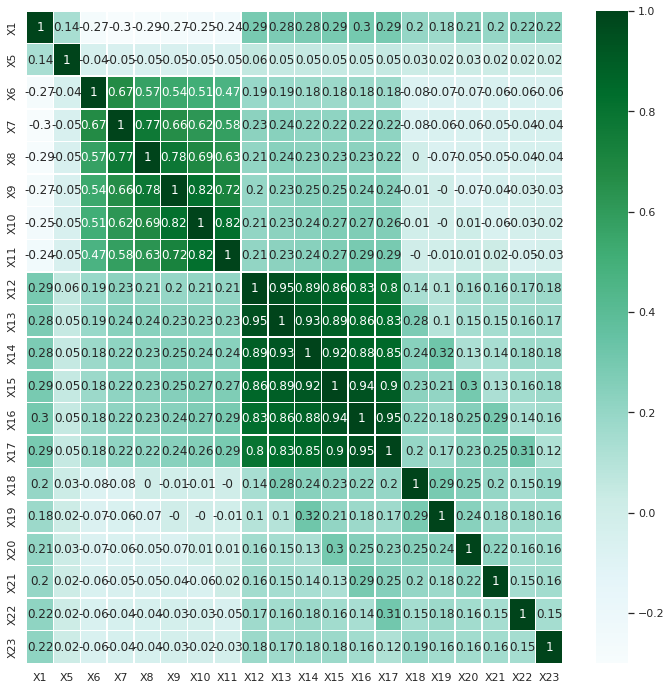

In [11]:
#Omitiremos las variables X2, X3 y X4 ya que son categoricas ordinales y/o presentan una opción "others" que hace dificil saber si una categoría es preferible sobre que otra. 

df_escalado = df_escalado.drop(['X2', 'X3', 'X4'], axis=1)
#Creamos un heatmap de las correlaciones

sns.set(rc={'figure.figsize':(12,12)}) 
sns.heatmap(round(df_escalado.corr(),2), annot = True, cmap= 'BuGn', linewidths= 0.5)
plt.show()

Se observa que hay variables estrechamente correlacionadas por lo que es conveniente realizar análisis de componentes principales para reducir la dimensionalidad de la base.

In [12]:
# se obtienen 5 componentes principales
pca = PCA(n_components=5) 
X_2 = pca.fit_transform(df_escalado) 

componentes = pca.explained_variance_ratio_

x=0
for i in componentes:
  print("El porcentaje de variación explicada por PC",x," es:",round(i,3)*100)
  x=x+1

El porcentaje de variación explicada por PC 0  es: 32.7
El porcentaje de variación explicada por PC 1  es: 20.3
El porcentaje de variación explicada por PC 2  es: 7.5
El porcentaje de variación explicada por PC 3  es: 5.0
El porcentaje de variación explicada por PC 4  es: 4.6


Si bien, observamos que los dos primeros componentes son los que describen una mayor cantidad de la varianza original de los datos, si incluimos la tercera se gana casi 10% extra por lo que se analizarán que variables son las más relevantes para cada uno de estos dos componentes.

In [26]:
#Se obtienen las 12 variables más importantes para cada una de las primeras 3 componentes
nombres = df_escalado.columns
for i in (0,1,2):
  df_pc = pd.DataFrame(pca.components_[i],nombres,columns=["val"])
  print(df_pc.sort_values('val',ascending=False).head(12))

          val
X15  0.354416
X16  0.352316
X14  0.350255
X13  0.346225
X17  0.345076
X12  0.334788
X10  0.210280
X9   0.206331
X11  0.205797
X8   0.199463
X7   0.193241
X6   0.160361
          val
X1   0.313437
X20  0.152156
X18  0.149647
X14  0.145988
X15  0.144823
X16  0.142874
X21  0.141753
X17  0.141030
X19  0.140516
X13  0.140165
X12  0.139942
X22  0.137542
          val
X19  0.437035
X18  0.400718
X20  0.397246
X21  0.337373
X23  0.295544
X22  0.263248
X10  0.155546
X11  0.153556
X9   0.136652
X8   0.099678
X1   0.051573
X7   0.044682


- Como se observa en el primer componente principal, las variables más importantes son las referentes a **Amount of bill statement** seguidas por las de **History of past payment**. Por lo tanto podríamos decir que la primer componente principal se refiere a la situación contable del crédito (al corriente, con atrasos, etc). 
- En la segunda componente principal, la variable **Amount of the given credit** tiene el doble de importancia que la segnda variable más relevante en este componente, por lo que podríamos decir que la segunda componente se refiere al monto original del crédito.
- Finalmente, en la tercer componente principal las variables más relevantes son las de **Amount of previous payment**, por lo que podemos decir que la tercer componente se refiere al historial de pagos. 

# 8. Elabora los histogramas de los atributos para visualizar su distribución.

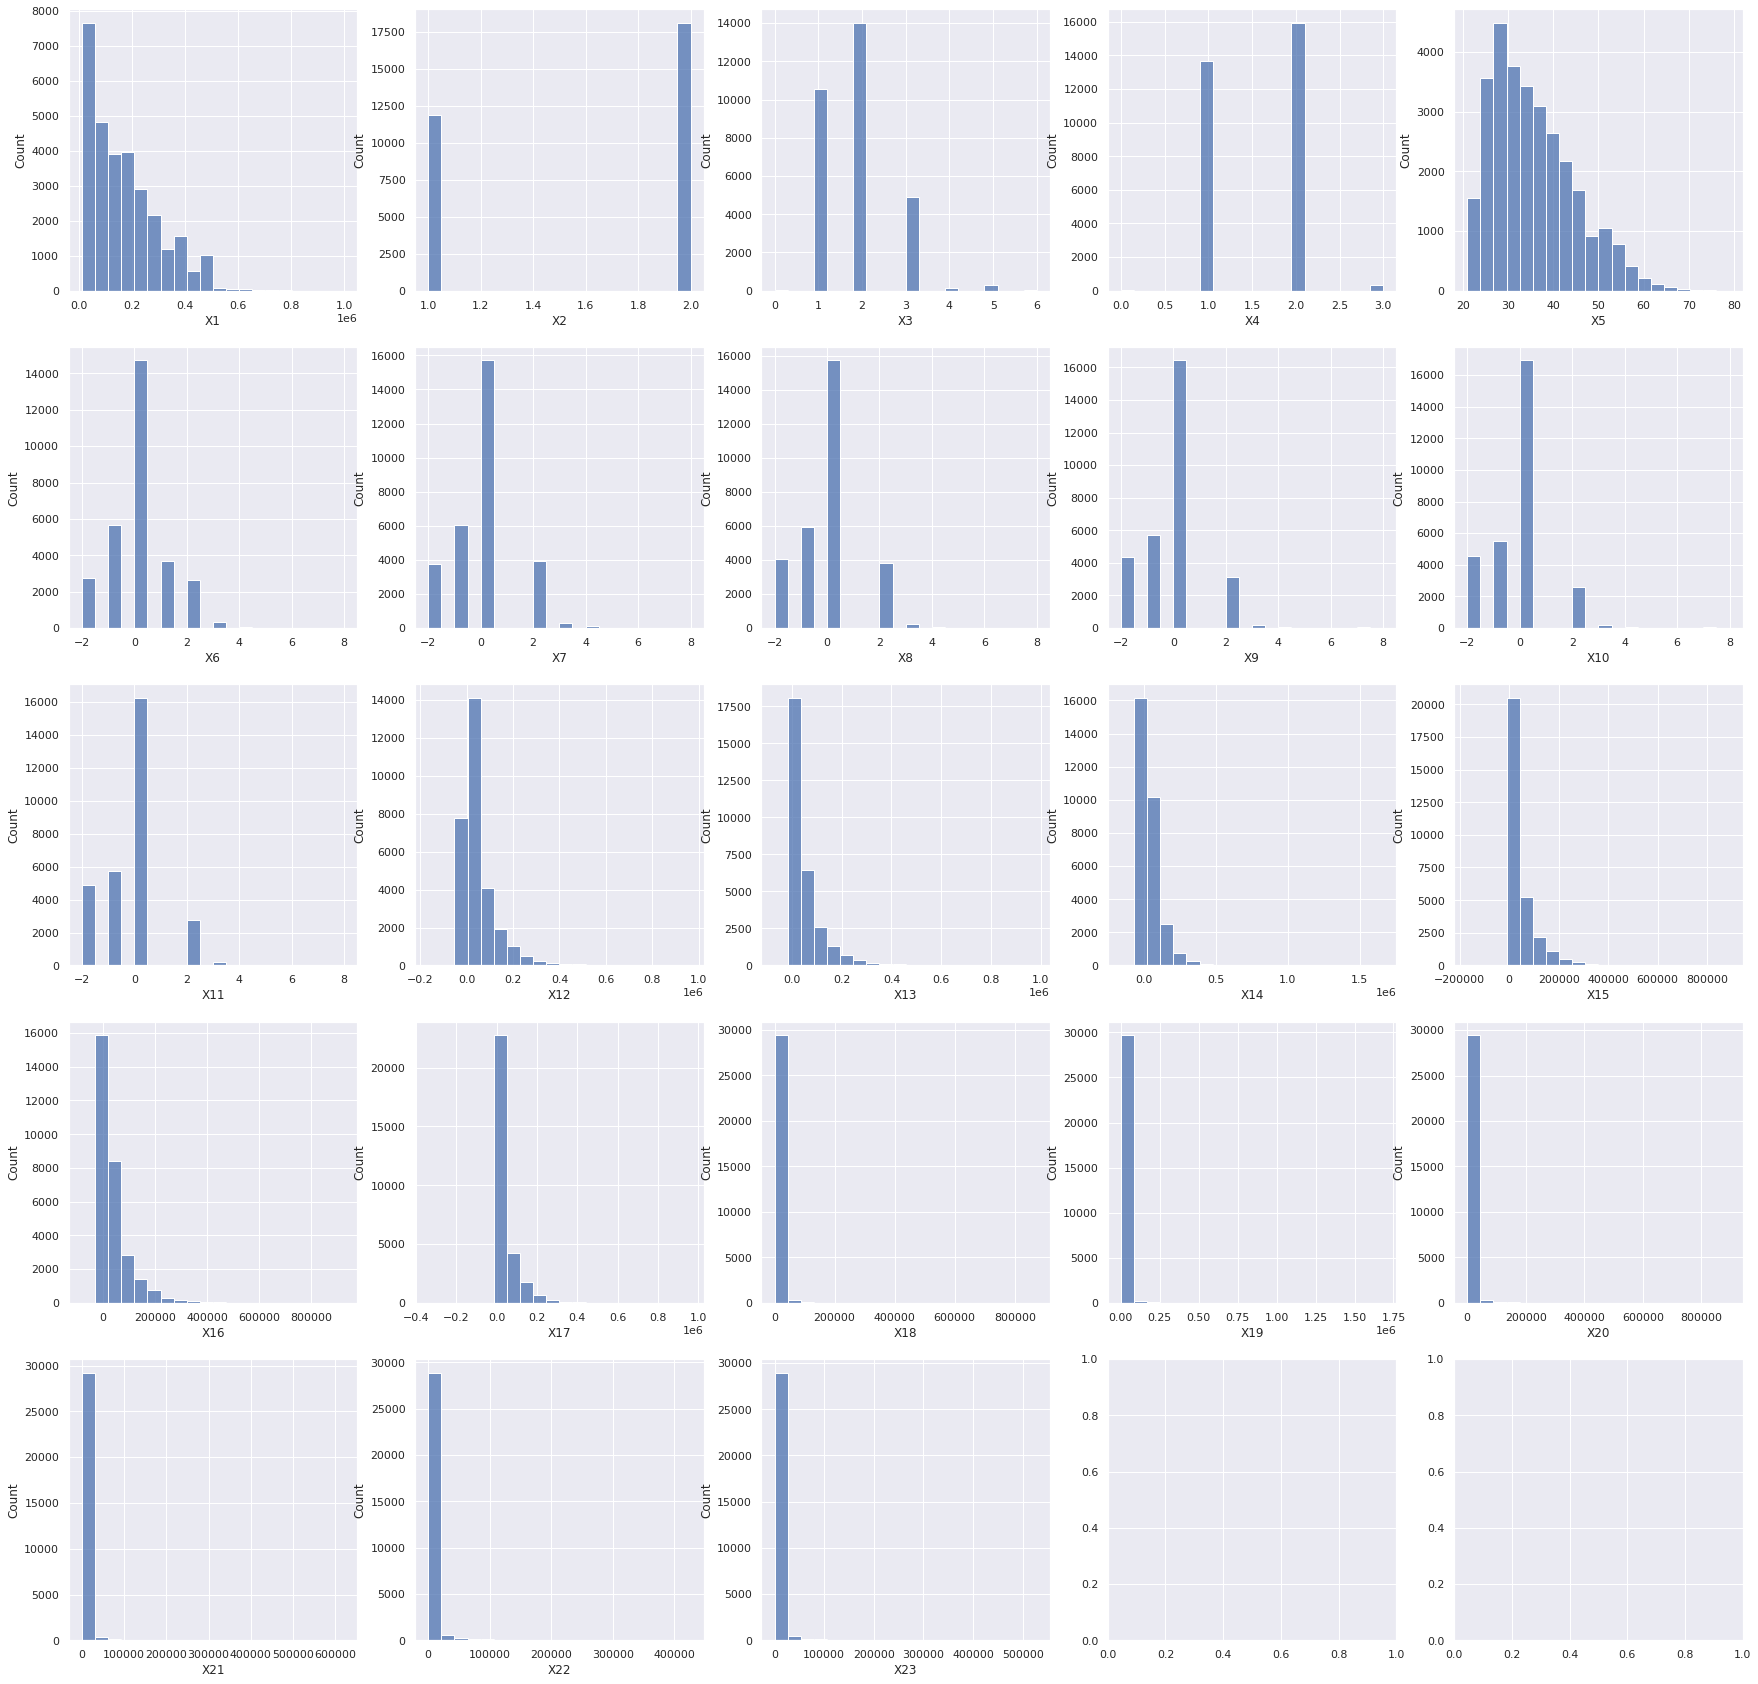

In [51]:
#Para ver la distribución original de los datos se realizarán los histogramas con el dataset sin escalar

df_hist = df.drop(['ID', 'Y'], axis=1)
nombres = df_hist.columns

sns.set(rc={'figure.figsize':(30,30)})
fig, axes = plt.subplots(5, 5)    

x=1

for i in nombres:       

    plt.subplot(5,5,x)      
    sns.histplot(df_hist[i], bins = 20)           
    plt.xlabel(i) 
    x = x +1

plt.show()

# 9. Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.

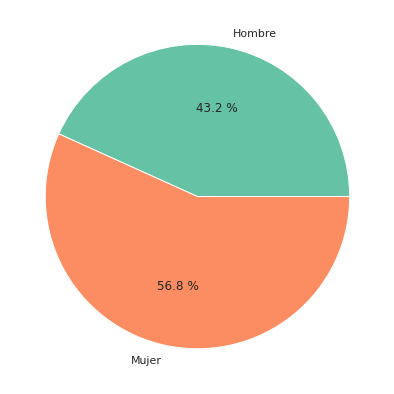

In [121]:
#Un análisis muy sencillo consiste en ver el impago tiene algún sesgo por genero

sns.set_palette("Set2")

df_genero = df [['X2','Y']]
df_genero = df_genero[df_genero['Y'] == 1]

datos = df_genero.groupby('X2').Y.count()
genero = ['Hombre', 'Mujer']

fig = plt.figure(figsize =(10, 7))
plt.pie(datos, labels = genero,autopct="%0.1f %%")
plt.show()

Si Y=1 se refiere a impago entonces en la gráfica se observa que las mujeres dentro de las personas con probabilidad de impago la mayoría son mujeres

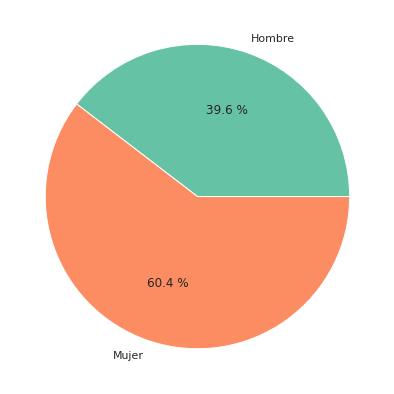

X2
1.0    24.2
2.0    20.8
Name: Y, dtype: float64

In [122]:
#Esto es para mostrar que la interpretación de los datos dependerá mucho de como se muestren
df_genero2 = df [['X2','Y']]
datos2 = df_genero2.groupby('X2').Y.count()

fig = plt.figure(figsize =(10, 7))
plt.pie(datos2, labels = genero,autopct="%0.1f %%")
plt.show()

proporcion = round(datos / datos2 * 100,1)
proporcion



Si solo vemos el primer pie observamos que de la gente con probabilidad de impago lel 57% son mujeres. Sin embargo en este segundo pie observamos que la población que estamos observando el 60% son mujeres así que podríamos estar interpretando mal dado que la misma población original tiene un sesgo.

Si observamos ahora por genero, de los hombres a los que se les otorgó un crédito, el 24% tiene probabilidad de impago mientras que en las mujeres este porcentaje es de 21%, por lo que se concluye que los hombres tienen mayor riesgo de impago que las mujeres.

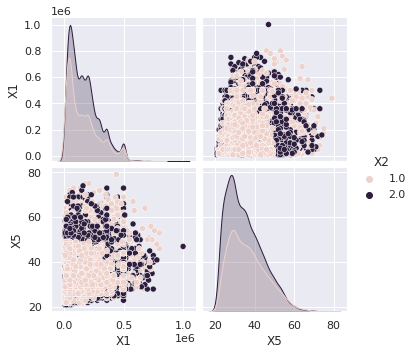

In [123]:
#Ahora haremos una pairplot

df_2 = df [['X2','X1','X5']]
sns.pairplot(df_2, hue ='X2') 
plt.show() 

Con la pairplot podemos ver que los montos más altos fueron otorgados a mujeres y que la mayoría de los créditos más grandes se otorgaron a personas menores de 40 años.


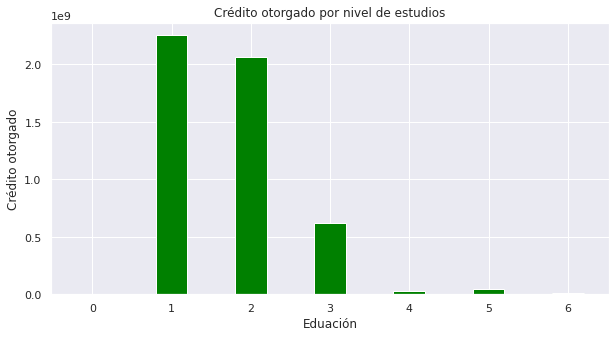

In [143]:
df_3 = df [['X1','X3']]
df_3 = df_3.groupby('X3', as_index=False).X1.sum()
df_ordenado = df_3.sort_values('X1',ascending=False)

fig = plt.figure(figsize = (10, 5))
 
plt.bar(df_ordenado['X3'], df_ordenado['X1'], color ='green',
        width = 0.4)
 
plt.xlabel("Eduación")
plt.ylabel("Crédito otorgado")
plt.title("Crédito otorgado por nivel de estudios")
plt.show()

En la gráfica anterior observamos que el crédito otorgado se agrupa más entre la gente con mayor grado de estudios. 

# 10. Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones.

1. La primer gráfica nos ayuda a ver de manera preliminar que los hombres tienen un mayor riesgo de caer en impago, por lo que será una variable importante a tener en cuenta en los análisis posteriores.

2. La segunda gráfica es importante en el sentido de conocer la distribución actual del otorgamiento de crédito. En un segundo paso sería conveniente ver si al igual que con el genero, eciste alguna relación importante entre la edad y la probabilidad de no pago.

3. Finalmente en la tercer gráfica podemos ver que tal vez el sector con menos educación es un sector subatendido de la población en cuanto al otorgamiento de crédito, por lo que podría ser importante explorar si, como se pensaria, este sector tiene una mayor propensión a no pagar o hay un costo de oportunidad en dicho segmento.